In [18]:
"""
Created on Mon July 5 2019

@author: John Kath
"""
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from pathlib import Path
from typing import List
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

from numpy import sin, cos, array, r_, vstack, abs, tile, pi
from numpy.linalg import norm

import skinematics as skin
from skinematics import imus, quat, vector, rotmat, view
from skinematics.sensors.manual import MyOwnSensor

In [2]:
# data pre processing
file_name_to_colume_names = {
    'Activity.csv': ['ID', 'SubjectID', 'Start_time', 'End_time', 'Relative_Start_time', 'Relative_End_time','Gesture_scenario', 'TaskID', 'ContentID'],
    'Accelerometer.csv': ['Systime', 'EventTime', 'ActivityID', 'X', 'Y', 'Z', 'Phone_orientation'],
    'Gyroscope.csv': ['Systime', 'EventTime', 'ActivityID', 'X', 'Y', 'Z', 'Phone_orientation'],
    'Magnetometer.csv': ['Systime', 'EventTime', 'ActivityID', 'X', 'Y', 'Z', 'Phone_orientation'],
}

In [3]:
def read_file(user_id: str, user_session_id: str, file_name: str, colume_names: List[str]) -> DataFrame:
    """
    Read one of the csv files for a user
    :param user_id: user id
    :param user_session_id: user session id
    :param file_name: csv file name (key of file_name_to_colume_names)
    :param colume_names: a list of column names of the csv file (value of file_name_to_colume_names)
    :return: content of the csv file as pandas DataFrame
    """
    # read data from csv
    filename = user_id + '_session_' + user_session_id + '_' + file_name
    csv_data = pd.read_csv(filename, names=colume_names)
    return pd.DataFrame(data=csv_data)

In [4]:
# pick the user as well as activities and extract features
data_act = read_file('151985', '2', 'Activity.csv', file_name_to_colume_names['Activity.csv'])
data_acc = read_file('151985', '2', 'Accelerometer.csv', file_name_to_colume_names['Accelerometer.csv'])
data_gyr = read_file('151985', '2', 'Gyroscope.csv', file_name_to_colume_names['Gyroscope.csv'])
data_mag = read_file('151985', '2', 'Magnetometer.csv', file_name_to_colume_names['Magnetometer.csv'])
# print(data_acc.dtypes)
# print(data_gyr.dtypes)

In [5]:
rate = 100.0
acc = np.column_stack((data_acc['X'], data_acc['Y'], data_acc['Z']))
omega = np.column_stack((data_gyr['X'], data_gyr['Y'], data_gyr['Z']))
mag = np.column_stack((data_mag['X'], data_mag['Y'], data_mag['Z']))

In [6]:
R_initialOrientation = np.eye(3)
initialPosition = np.zeros(3)

# q1, pos1 = analytical(R_initialOrientation, omega, initialPosition, acc, rate)
q_analytical, pos_analytical, vel_analytical = imus.analytical(R_initialOrientation, omega[:88000], initialPosition, acc[:88000], rate)
# express quat as Euler angles
e_analytical = quat.quat2seq(q_analytical, seq='Euler')

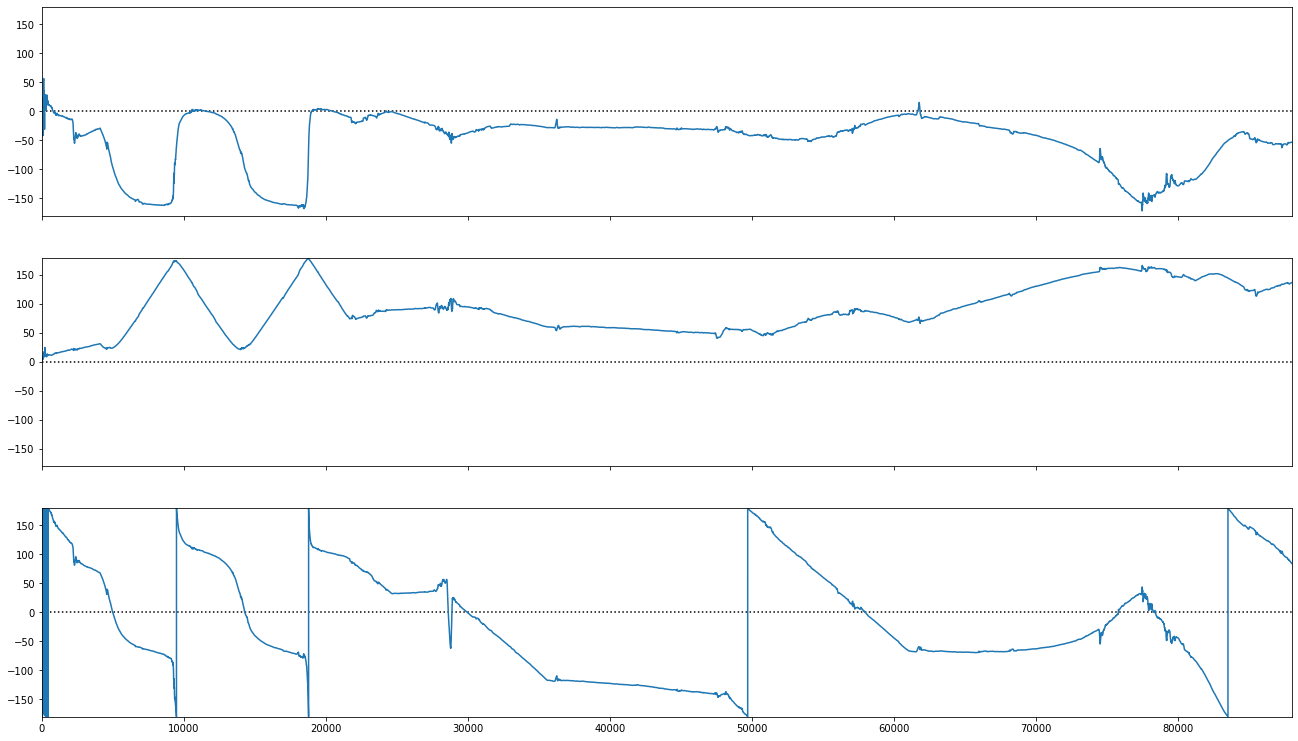

In [51]:
view.ts(e_analytical)

Animation saved to q_analytical.mp4


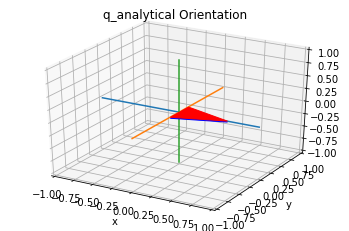

In [54]:
out_file = 'q_analytical.mp4'
view.orientation(q_analytical[:600], out_file, 'q_analytical Orientation', deltaT=1000./rate)

In [7]:
# imus.kalman(rate, acc, omega, mag)
q_Kalman = imus.kalman(rate, acc[:88000], omega[:88000], mag[:88000])ess quat as rotation matrix
# r_Kalman = quat.convert(q_Kalman, to='rotmat')
# r_Kalman.reshape((-1,3))
# express quat as Euler angles
e_Kalman = quat.quat2seq(q_Kalman, seq='Euler')

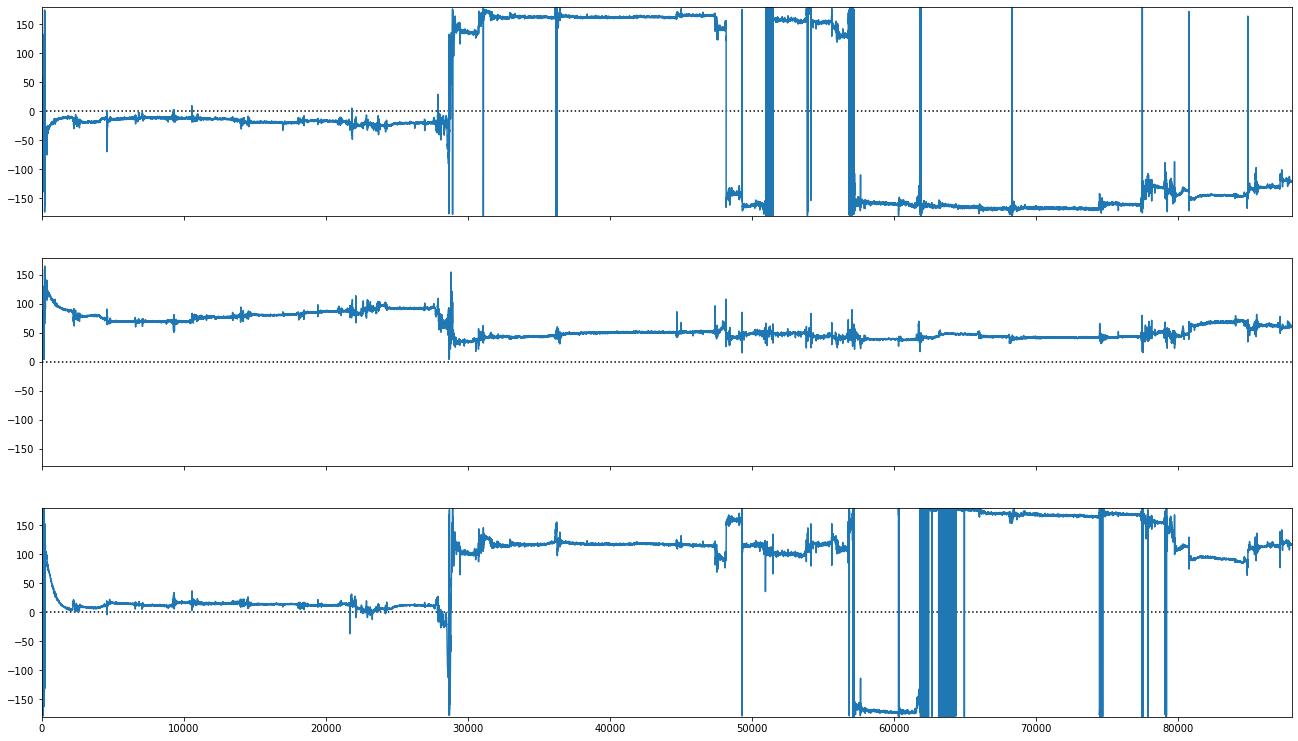

In [52]:
view.ts(e_Kalman)

Animation saved to q_Kalman.mp4


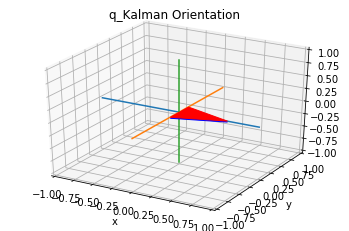

In [22]:
out_file = 'q_Kalman.mp4'
view.orientation(q_Kalman[:600], out_file, 'q_Kalman Orientation', deltaT=1000./rate)

In [8]:
initialPosition = array([0,0,0])
R_initialOrientation = rotmat.R(0,90)

# get data
in_data = {'rate' : rate, 'acc' : acc[:88000], 'omega' : omega[:88000], 'mag' : mag[:88000]}

my_sensor = MyOwnSensor(in_file=None, in_data=in_data,
                        R_init=R_initialOrientation,
                        pos_init=initialPosition, 
                        q_type='madgwick')

# and then check, if the quat_vector = [0, sin(45), 0]
q_madgwick = my_sensor.quat
# express quat as rotation matrix
# r_madgwick = quat.convert(q_madgwick, to='rotmat')
# r_madgwick.reshape((-1,3))
# express quat as Euler angles
e_madgwick = quat.quat2seq(q_madgwick, seq='Euler')

result = quat.q_vector(q_madgwick[-1])
correct = array([ 0.,  np.sin(np.deg2rad(45)),  0.])
error = norm(result-correct)

Calculating the Quaternions [#########################] 88000/88000


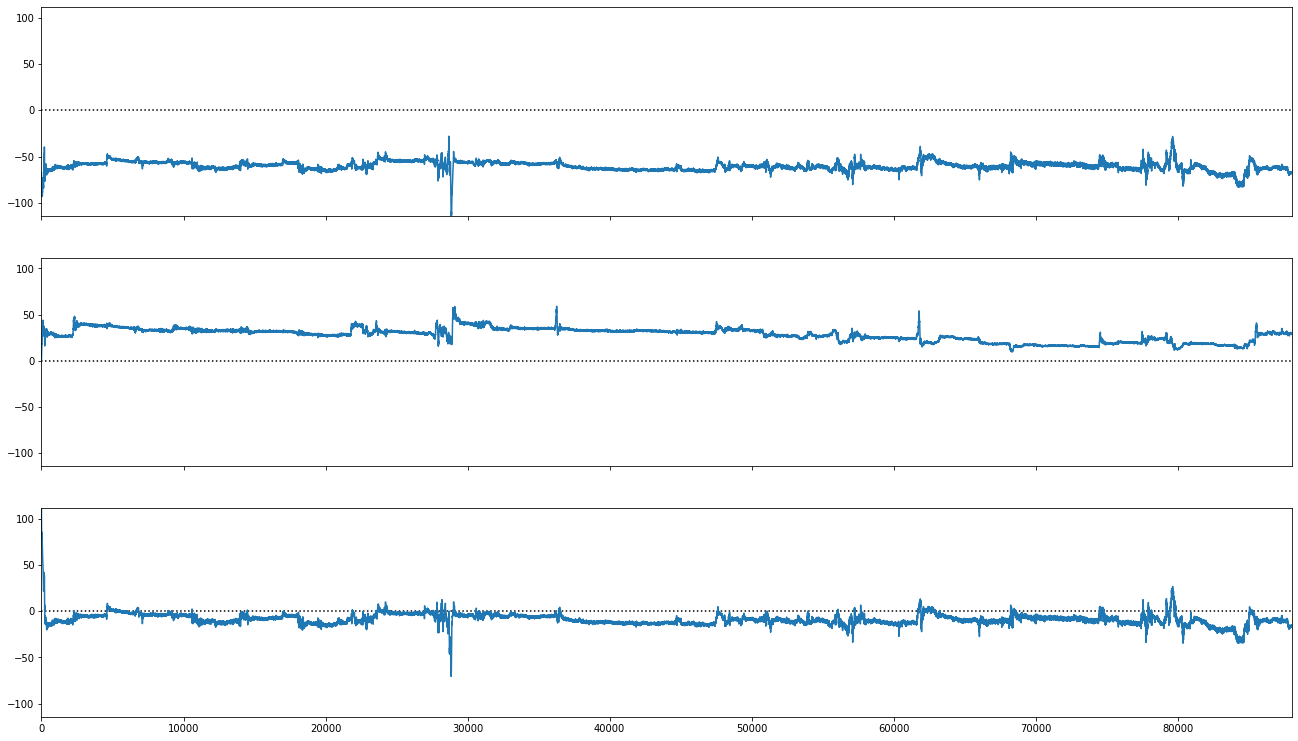

In [35]:
view.ts(e_madgwick)

Animation saved to q_madgwick.mp4


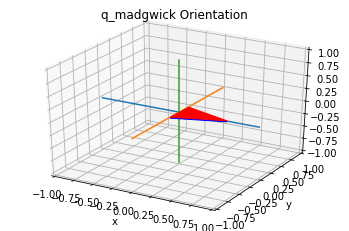

In [31]:
out_file = 'q_madgwick.mp4'
view.orientation(q_madgwick[:600], out_file, 'q_madgwick Orientation', deltaT=1000./rate)

In [9]:
initialPosition = array([0,0,0])
R_initialOrientation = rotmat.R(0,90)

# get data
in_data = {'rate' : rate, 'acc' : acc[:88000], 'omega' : omega[:88000], 'mag' : mag[:88000]}

my_sensor = MyOwnSensor(in_file=None, in_data=in_data,
                        R_init=R_initialOrientation,
                        pos_init=initialPosition, 
                        q_type='mahony')

# and then check, if the quat_vector = [0, sin(45), 0]
q_mahony = my_sensor.quat
# express quat as rotation matrix
# r_mahony = quat.convert(q_mahony, to='rotmat')
# r_mahony.reshape((-1,3))
# express quat as Euler angles
e_mahony = quat.quat2seq(q_mahony, seq='Euler')

result = quat.q_vector(q_mahony[-1])
correct = array([ 0.,  np.sin(np.deg2rad(45)),  0.])
error = norm(result-correct)

Calculating the Quaternions [#########################] 88000/88000


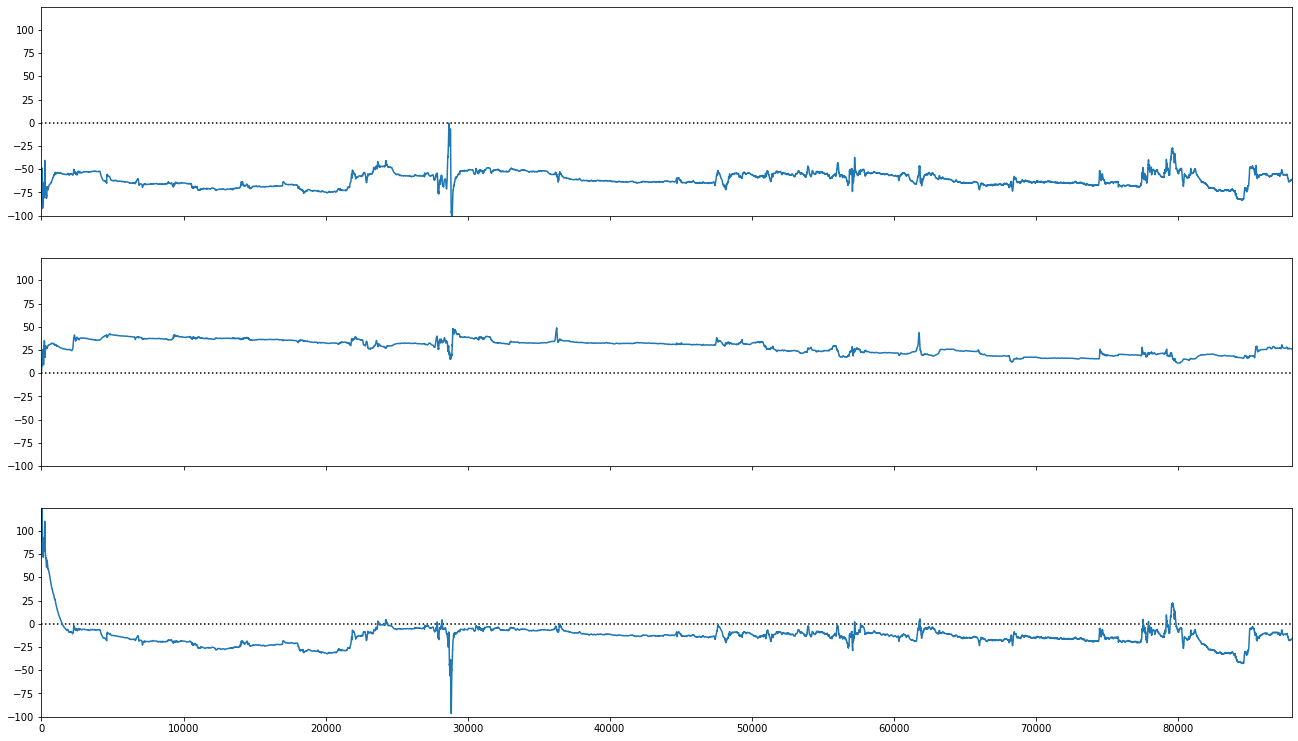

In [38]:
view.ts(e_mahony)

Animation saved to q_mahony.mp4


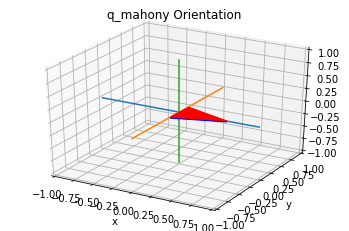

In [32]:
out_file = 'q_mahony.mp4'
view.orientation(q_mahony[:600], out_file, 'q_mahony Orientation', deltaT=1000./rate)